# Top 20 Python Data-Science Interview Questions 2025 + 5 Essential Concepts Every Data Scientist Should Know

# Part 1: Questions

## Lists and tuples

In [1]:
# List 
nums = [1, 2, 3]
nums[0] = 99          # works
nums.append(4)        # works
print(nums)           # [99, 2, 3, 4]

[99, 2, 3, 4]


In [2]:
# Tuple (immutable)
coords = (10, 20, 30)
try:
    coords[0] = 0     # TypeError
except TypeError as e:
    print(e)         # 'tuple' object does not support item assignment

'tuple' object does not support item assignment


## Python lists vs NumPy arrays

In [3]:
import numpy as np, timeit, random

N = 1_000_000
py_list = [random.random() for _ in range(N)]
np_arr  = np.array(py_list)

def list_sum():     # Python loop
    return sum(x**2 for x in py_list)

def numpy_sum():    # Vectorised
    return np_arr.dot(np_arr)


In [4]:
print("List  :", timeit.timeit(list_sum,  number=10))
print("NumPy :", timeit.timeit(numpy_sum, number=10))
print("Speedup :", round(timeit.timeit(list_sum,  number=10)/timeit.timeit(numpy_sum, number=10)))

List  : 0.8038781179348007
NumPy : 0.0023022169480100274
Speedup : 430


## List comprehension and dictionary comprehension

In [5]:
# List comprehension example: get words containing 'b'
words = ["boy", "apple", "boat", "cat", "girl", "dog"]
result = [w for w in words if "t" in w]
print(result)  # Output: ['boat', 'cat']

['boat', 'cat']


In [6]:
# Dictionary comprehension example: map numbers to their cubes if > 2
nums = {'a': 1, 'b': 2, 'c': 3, 'd': 4}
cube_map = {k: v**3 for k, v in nums.items() if v > 2}
print(cube_map)  # Output: {'c': 27, 'd': 64}

{'c': 27, 'd': 64}


## Anonymous functions

In [7]:
# Lambda function to add two numbers
add = lambda x, y: x + y
print(add(3, 5))  # Output: 8

# Using lambda in sorted to sort words by length
words = ["data", "science", "AI", "Python", "ML", "Statistics"]
sorted_by_length = sorted(words, key=lambda w: len(w))
print(sorted_by_length)  # Output: ['AI', 'ML', 'data', 'Python', 'science', 'Statistics']

8
['AI', 'ML', 'data', 'Python', 'science', 'Statistics']


## Yield vs return

In [8]:
def countdown(n):
    while n > 0:
        yield n   # yield produces the next value and pauses
        n -= 1

# Using the generator:
for num in countdown(6):
    print(num)
# Output: 6 5 4 3 2 1

6
5
4
3
2
1


## Pandas .loc and .iloc 

In [9]:
import pandas as pd, numpy as np
df = pd.DataFrame(np.arange(20).reshape(5,4),
                  columns=list("ABCD"), index=list("vwxyz"))

In [10]:
print(df)

    A   B   C   D
v   0   1   2   3
w   4   5   6   7
x   8   9  10  11
y  12  13  14  15
z  16  17  18  19


In [11]:
df.loc["w":"y", "A":"B"]   # label-based

,A,B
w,4,5
x,8,9
y,12,13


In [12]:
df.iloc[0:3, 0:2]          # position-based

,A,B
v,0,1
w,4,5
x,8,9


## Missing values in Pandas

In [13]:
np.random.seed(86)
truth = pd.Series(np.random.randn(10), name="signal")
data  = truth.copy()
data.iloc[[2, 5, 7]] = np.nan           # inject NaNs

In [14]:
print("Missing count →", data.isna().sum())

Missing count → 3


In [15]:
filled = data.fillna(data.mean())       # mean imputation

In [16]:
print(data)

0   -0.596286
1   -0.605418
2         NaN
3   -0.623220
4    0.693539
5         NaN
6   -1.582419
7         NaN
8   -0.043294
9    1.163529
Name: signal, dtype: float64


In [17]:
print(filled)

0   -0.596286
1   -0.605418
2   -0.227653
3   -0.623220
4    0.693539
5   -0.227653
6   -1.582419
7   -0.227653
8   -0.043294
9    1.163529
Name: signal, dtype: float64


## Merge, join, and concatenate

In [18]:
# Create dfs
left_df  = pd.DataFrame({'id':[1,2,3,4], 'L':['A','B','C', 'D']})
right_df = pd.DataFrame({'id':[2,3,4,5], 'R':['W','X','Y','Z']})

In [19]:
left_df

,id,L
0,1,A
1,2,B
2,3,C
3,4,D


In [20]:
right_df

,id,R
0,2,W
1,3,X
2,4,Y
3,5,Z


In [21]:
pd.merge(left_df, right_df, on="id", how="inner")   # inner

,id,L,R
0,2,B,W
1,3,C,X
2,4,D,Y


In [22]:
pd.merge(left_df, right_df, on="id", how="left")    # left

,id,L,R
0,1,A,NaN
1,2,B,W
2,3,C,X
3,4,D,Y


In [23]:
pd.merge(left_df, right_df, on="id", how="right")   # right

,id,L,R
0,2,B,W
1,3,C,X
2,4,D,Y
3,5,NaN,Z


In [24]:
pd.merge(left_df, right_df, on="id", how="outer")   # full outer

,id,L,R
0,1,A,NaN
1,2,B,W
2,3,C,X
3,4,D,Y
4,5,NaN,Z


In [25]:
left_df.set_index('id').join(right_df.set_index('id'), how='outer')  # same as above

,L,R
id,,
1,A,NaN
2,B,W
3,C,X
4,D,Y
5,NaN,Z


In [26]:
pd.concat([left_df, right_df], axis=0, ignore_index=True)

,id,L,R
0,1,A,NaN
1,2,B,NaN
2,3,C,NaN
3,4,D,NaN
4,2,NaN,W
5,3,NaN,X
6,4,NaN,Y
7,5,NaN,Z


## Groupby

In [27]:
import pandas as pd

# Sample DataFrame
data = {'Country': ['US', 'US', 'Canada', 'Canada', 'US'],
        'Sales': [100, 200, 50, 120, 90]}
df = pd.DataFrame(data)

grouped = df.groupby('Country')['Sales'].sum()
print(grouped)
# Output:
# Country
# Canada     170
# US         390
# Name: Sales, dtype: int64

Country
Canada    170
US        390
Name: Sales, dtype: int64


## Broadcasting in NumPy

In [28]:
import numpy as np

A = np.array([[1, 2, 3],
              [4, 5, 6]])        # Shape (2,3)
b = np.array([10, 20, 30])       # Shape (3,)

result = A + b  # b is broadcasted to shape (2,3)
print(result)
# Output:
# [[11 22 33]
#  [14 25 36]]

[[11 22 33]
 [14 25 36]]


## Word counter

In [29]:
from collections import Counter

def word_frequencies(text: str) -> Counter:
    words = text.split()  # split on whitespace by default
    return Counter(words)

# Example usage:
text = "data science is fun and data is powerful"
freqs = word_frequencies(text)
print(freqs)
# Output: Counter({'data': 2, 'is': 2, 'science': 1, 'fun': 1, 'and': 1, 'powerful': 1})

Counter({'data': 2, 'is': 2, 'science': 1, 'fun': 1, 'and': 1, 'powerful': 1})


In [30]:
# manually
def word_frequencies_manual(text: str) -> dict:
    freq = {}
    for word in text.split():
        freq[word] = freq.get(word, 0) + 1
    return freq

In [31]:
word_frequencies_manual(text)

{'data': 2, 'science': 1, 'is': 2, 'fun': 1, 'and': 1, 'powerful': 1}

## Reverse a string

In [32]:
def reverse_string(s):
    # Slice the string with step -1 to reverse
    return s[::-1]

In [33]:
print(reverse_string("DataScience"))  # Output: "ecneicSataD"

ecneicSataD


## Init and Self

In [34]:
class Trade:
    def __init__(self, symbol, qty, price):
        self.symbol, self.qty, self.price = symbol, qty, price
        self.value = qty * price

In [35]:
Trade("AAPL", 1000, 211.26).value   # 211260.0

211260.0

## Decorators

In [36]:
import time
def timer(func):                        # decorator factory
    def wrapper(*args, **kwargs):       # preserves signature
        start = time.perf_counter()
        result = func(*args, **kwargs)
        elapsed = time.perf_counter() - start
        print(f"{func.__name__} ran in {elapsed:.4f}s")
        return result
    return wrapper

In [37]:
@timer
def intense_compute(n=1_000_000):
    return sum(i*i-i for i in range(n))

intense_compute()   # prints timing without touching original logic

intense_compute ran in 0.0926s


333332333334000000

## Metaclasses

In [38]:
# Metaclass that auto-adds an audit stamp to every new class
class AuditMeta(type):
    def __new__(mcls, name, bases, namespace):
        namespace['__audit_stamp__'] = f"BuiltBy:{name}"
        return super().__new__(mcls, name, bases, namespace)

class Order(metaclass=AuditMeta):
    pass

class Trade(metaclass=AuditMeta):
    pass

In [39]:
print(Order.__audit_stamp__)   # BuiltBy:Order
print(Trade.__audit_stamp__)   # BuiltBy:Trade

BuiltBy:Order
BuiltBy:Trade


## Monkey patching

In [40]:
from types import MethodType
import http.client as http  # any built-in module works

# Original class has no greet method
conn = http.HTTPConnection("example.com")
# conn.greet()  # AttributeError if called now

#  monkey patch
def greet(self):
    return f"Hello from {self.__class__.__name__}!"

http.HTTPConnection.greet = greet   # inject method

In [41]:
# Now every HTTPConnection instance has 'greet'
print(conn.greet())                            # Hello from HTTPConnection!

Hello from HTTPConnection!


In [42]:
print(http.HTTPConnection("foo.com").greet())  # works on new objects too

Hello from HTTPConnection!


## Binary search 

In [43]:
def binary_search(arr, target):
    lo, hi = 0, len(arr)-1
    while lo <= hi:
        mid = (lo + hi)//2
        if arr[mid] == target:
            return mid
        lo, hi = (mid+1, hi) if arr[mid] < target else (lo, mid-1)
    return -1

In [44]:
binary_search(np.array([i**2 for i in range(0,100)]),1521)

39

In [45]:
39**2

1521

## Unique values in a sorted array

In [46]:
def unique_sorted(arr):
    """
    Remove duplicates from a sorted list in-place.
    Returns the new length containing unique elements only.
    """
    before = 0                           # last unique index
    for after in range(1, len(arr)):
        if arr[after] != arr[before]:    # found a new unique value
            before += 1
            arr[before] = arr[after]     # copy it forward
    return before + 1                    # logical length of shortened prefix

In [47]:
nums = [1, 1, 2, 2, 2, 3, 4, 4]
new_len = unique_sorted(nums)
print("New length:", new_len)          # 4
print("Unique slice:", nums[:new_len]) # [1, 2, 3, 4]

New length: 4
Unique slice: [1, 2, 3, 4]


## Missing number

In [48]:
def missing_by_sum(nums):
    n   = len(nums) + 1                    # original size
    expected_sum = n * (n + 1) // 2        # expected sum 1..n
    actual_sum = sum(nums)                 # actual sum
    return expected_sum - actual_sum       # missing number

In [49]:
missing_by_sum(np.array([1,2,3,4,6,7,8,9,10]))

5

## Palindromes

In [50]:
def is_palindrome(text):
    cleaned = ''.join(ch.lower() for ch in text if ch.isalnum())
    return cleaned == cleaned[::-1]

In [51]:
print(is_palindrome("RaceCar"))                          # True
print(is_palindrome("A man, a plan, a canal: Panama"))   # True
print(is_palindrome("OpenAI"))                           # False

True
True
False


# Part 2: Essential Concepts

## P-value

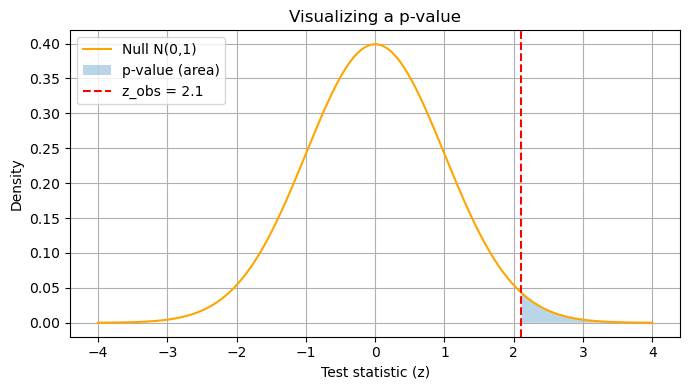

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon

z_obs = 2.1  # observed z-statistic
x = np.linspace(-4, 4, 400)
pdf = norm.pdf(x)

plt.figure(figsize=(7,4))
plt.plot(x, pdf, label='Null N(0,1)', color="orange")
plt.fill_between(x, pdf, where=(x >= z_obs), alpha=0.3, label='p-value (area)')
plt.axvline(z_obs, color='red', linestyle='--', label=f'z_obs = {z_obs}')
plt.title('Visualizing a p-value')
plt.xlabel('Test statistic (z)')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

### BONUS: Calculating p-value

In [53]:

# --------------------------------------------------
# Observed test statistic under H0 ~ N(0, 1)
# --------------------------------------------------
z_obs = 2.1

# One-sided (upper-tail) p-value:  P(Z ≥ z_obs | H0) # shaded area above
p_one_sided = 1 - norm.cdf(z_obs)

print(f"Observed z         : {z_obs:.1f}")
print(f"One-sided p-value  : {p_one_sided:.4f}")

Observed z         : 2.1
One-sided p-value  : 0.0179


## Central Limit Theorem

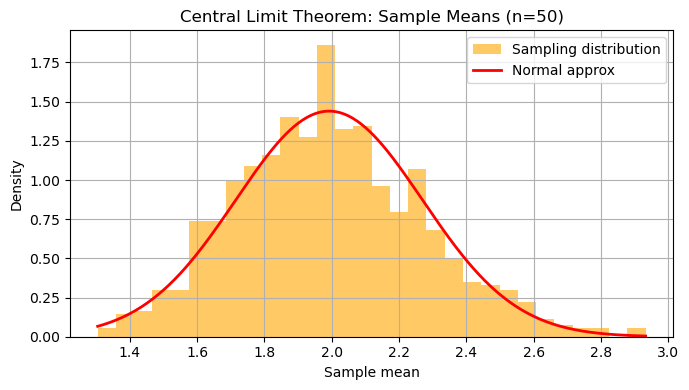

In [54]:
np.random.seed(42)
n = 50
means = [np.mean(expon.rvs(scale=2, size=n)) for _ in range(1000)] # exponential distribution
mean_mu, mean_sigma = np.mean(means), np.std(means)

plt.figure(figsize=(7,4))
plt.hist(means, bins=30, density=True, alpha=0.6, label='Sampling distribution', color="orange")
x2 = np.linspace(min(means), max(means), 400)
plt.plot(x2, norm.pdf(x2, mean_mu, mean_sigma), label='Normal approx', lw=2, color="red")
plt.title('Central Limit Theorem: Sample Means (n=50)')
plt.xlabel('Sample mean')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

We are generating a random sample of size $50$ from an exponential distribution having **rate** $\lambda$: $f(x;\lambda) =\lambda exp(-x\lambda) , x \geq 0$. Thus, $X\sim Exp(\lambda)$. The mean and standard deviation is this case are both $\frac{1}{\lambda}$ which is also referred as **scale** parameter. Therefore, in the case above both the mean and standard deviation are 2.  

Remember that sampling distribution of the sample mean is approximately normal:
$$
  \bar{X} \sim N(\mu, \frac{\sigma}{\sqrt{n}})
$$

Therefore, the Normal approximation of the sampling distribution is:
$$
  \bar{X} \sim N(2, \frac{2}{\sqrt{50}})
$$

In practice, instead of plugging in the theoretical values $\mu$ and $\sigma$, we estimate them directly from the sample.

In [55]:
print(f"Theoretical mu  is 2")

Theoretical mu  is 2


In [56]:
print(f"Empirical μ  is {np.mean(means):.3f}")

Empirical μ  is 1.992


In [57]:
print(f"Theoretical σ  is {2/np.sqrt(n):.3f}")

Theoretical σ  is 0.283


In [58]:
print(f"Empirical σ  is {np.std(means) :.3f}")

Empirical σ  is 0.277


## Type I and Type II Errors

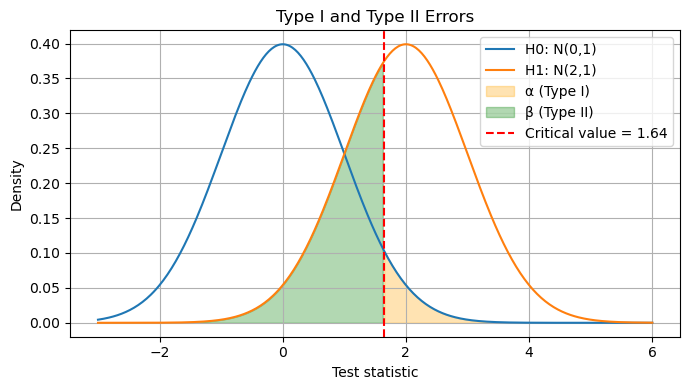

In [59]:
crit = norm.ppf(0.95)  # critical value for alpha=0.05, one-sided
x = np.linspace(-3, 6, 400)
null_pdf = norm.pdf(x, 0, 1)
alt_pdf  = norm.pdf(x, 2, 1)

plt.figure(figsize=(7,4))
plt.plot(x, null_pdf, label='H0: N(0,1)')
plt.plot(x, alt_pdf,  label='H1: N(2,1)')
# alpha region
plt.fill_between(x, null_pdf, where=(x >= crit), alpha=0.3, color='orange', label='α (Type I)')
# beta region
plt.fill_between(x, alt_pdf, where=(x < crit), alpha=0.3, color='green', label='β (Type II)')
plt.axvline(crit, color='red', linestyle='--', label=f'Critical value = {crit:.2f}')
plt.title('Type I and Type II Errors')
plt.xlabel('Test statistic')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### BONUS: Calculating α, β, and power  

In [60]:
from scipy.stats import norm

# --------------------------------------------------------------------
# PARAMETERS 
# --------------------------------------------------------------------
mu_null  = 0                   # mean under H0
mu_alt   = 2                   # mean under H1
sigma    = 1                   # common standard deviation
crit=1.64

# --------------------------------------------------------------------
# 1.  alpha  (Type I error): probability of rejecting H0 when H0 is true
# --------------------------------------------------------------------
alpha = 1 - norm.cdf(crit, loc=mu_null, scale=sigma)   

# --------------------------------------------------------------------
# 2.  beta  (Type II error): probability of *not* rejecting H0 when H1 is true
# --------------------------------------------------------------------
beta = norm.cdf(crit, loc=mu_alt, scale=sigma)         

# --------------------------------------------------------------------
# 3.  Power = (1 − beta ):  probability of correctly rejecting H0 under H1
# --------------------------------------------------------------------
power = 1 - beta                                       

# --------------------------------------------------------------------
# DISPLAY RESULTS
# --------------------------------------------------------------------
print(f"α (Type I error)  = {alpha:.3f}")
print(f"β (Type II error) = {beta:.3f}")
print(f"Power             = {power:.3f}")

α (Type I error)  = 0.051
β (Type II error) = 0.359
Power             = 0.641


## Confusion Matrix

In [61]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = [1, 0, 1, 1, 0, 1, 1]         # actual labels
y_pred = [1, 0, 0, 1, 0, 0, 1]         # model predictions

In [62]:
print(confusion_matrix(y_true, y_pred))
# Output (matrix layout):
# [[TN, FP]
#  [FN, TP]]

[[2 0]
 [2 3]]


In [63]:
# This will print precision, recall, F1 for each class.
print(classification_report(y_true, y_pred))

# Precision = TP / (TP + FP)                                       
# Recall (Sensitivity) = TP / (TP + FN)                       
# F1-Score = 2 * (Precision * Recall) / (Precision + Recall)   
# Accuracy = (TP + TN) / total sample

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.60      0.75         5

    accuracy                           0.71         7
   macro avg       0.75      0.80      0.71         7
weighted avg       0.86      0.71      0.73         7



## Cross-validation 

In [64]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, cross_validate  # Added cross_validate import

# 1. Generate fake features X and binary labels y
X, y = make_classification(
    n_samples=1000,      # rows
    n_features=20,       # columns
    n_informative=10,    # truly predictive features
    n_redundant=5,       # linear combos of informatives
    n_classes=2,
    random_state=1933
)

# 2. Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000, solver="lbfgs")

# 3. 5‑fold cross‑validation with shuffling for robustness
kf      = KFold(n_splits=5, shuffle=True, random_state=42)

# 4. Evaluate four metrics at once
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv = cross_validate(model, X, y, cv=kf, scoring=scoring, return_train_score=False)

# 5. Display per-fold and mean scores
for metric in scoring:
    print(f"{metric.capitalize()} per fold :", cv[f'test_{metric}'])
    print(f"Mean {metric:9}: {cv[f'test_{metric}'].mean():.3f}\n")

Accuracy per fold : [0.865 0.84  0.855 0.835 0.845]
Mean accuracy : 0.848

Precision per fold : [0.87878788 0.84347826 0.79787234 0.81730769 0.85576923]
Mean precision: 0.839

Recall per fold : [0.85294118 0.87387387 0.88235294 0.85858586 0.84761905]
Mean recall   : 0.863

F1 per fold : [0.86567164 0.85840708 0.83798883 0.83743842 0.85167464]
Mean f1       : 0.850

